In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\mushahid\Downloads\house_prediction\house_prediction.csv.csv')
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,N,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,N,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,N,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,N,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,N,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.isnull().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.shape

(21613, 21)

In [6]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')


In [7]:
df.drop(columns=['id'], inplace=True)


In [8]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,N,0,Average,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,N,0,Average,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,N,0,Average,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,N,0,Very Good,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,N,0,Average,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
print(df['waterfront'].unique())
print(df['condition'].unique())


['N' 'Y']
['Average' 'Very Good' 'Good' 'Poor' 'Fair']


In [10]:
df['waterfront'] = df['waterfront'].map({'N': 0, 'Y': 1})

In [11]:
condition_map = {
    'Poor': 1,
    'Fair': 2,
    'Average': 3,
    'Good': 4,
    'Very Good': 5
}
df['condition'] = df['condition'].map(condition_map)


In [12]:
print(df['waterfront'].unique())  # should show [0, 1]
print(df['condition'].unique())   # should show [1, 2, 3, 4, 5]


[0 1]
[3 5 4 1 2]


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


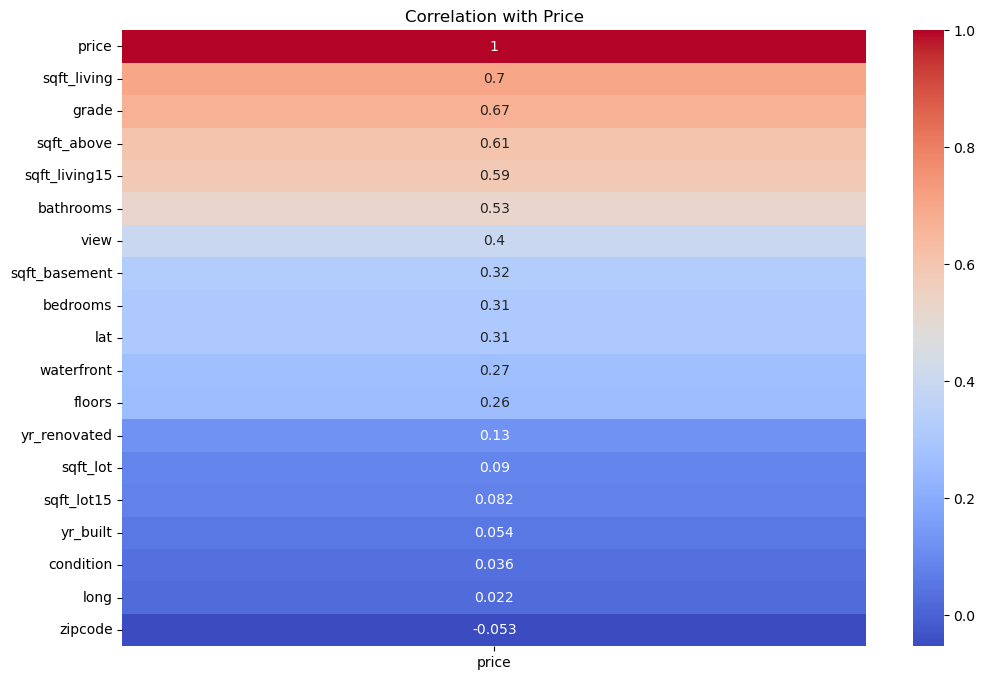

In [14]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix[['price']].sort_values(by='price', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation with Price")
plt.show()


C:\Users\mushahid\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


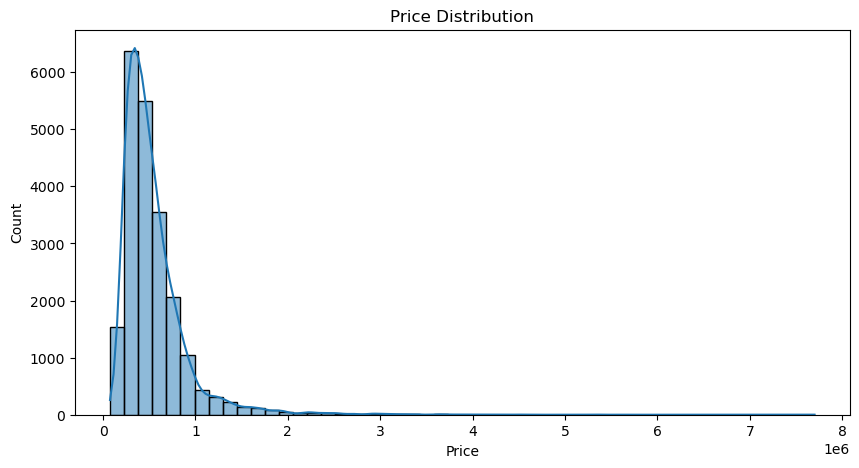

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


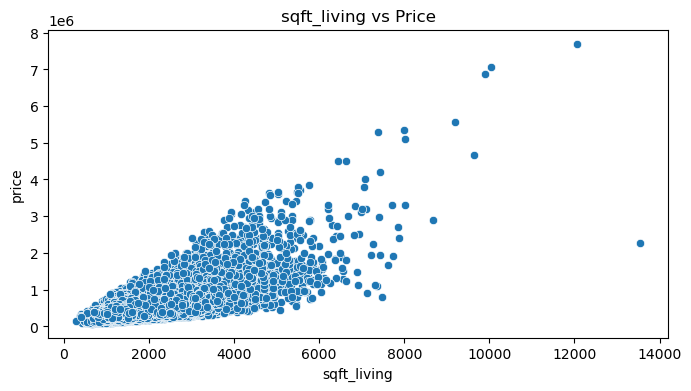

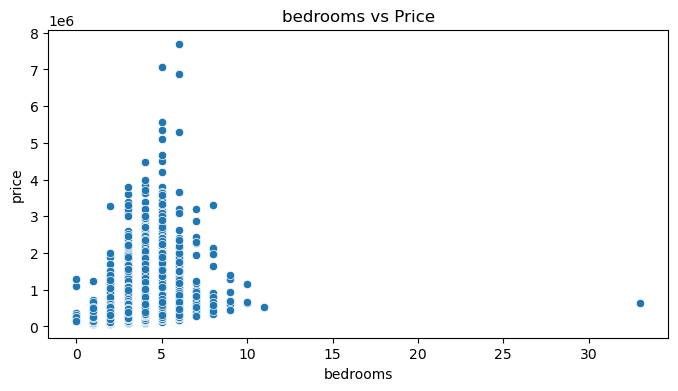

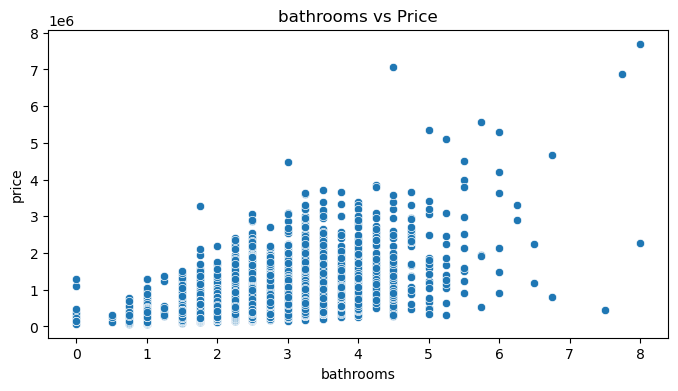

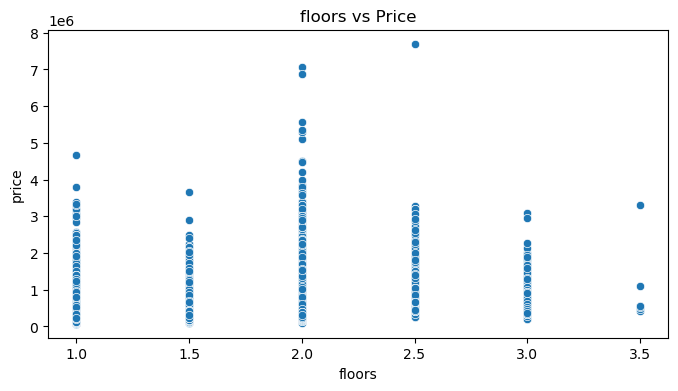

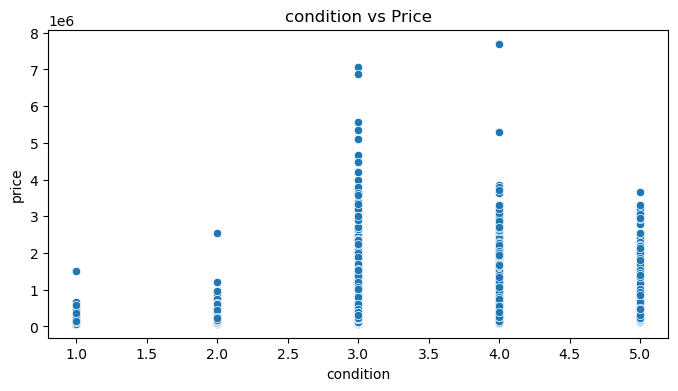

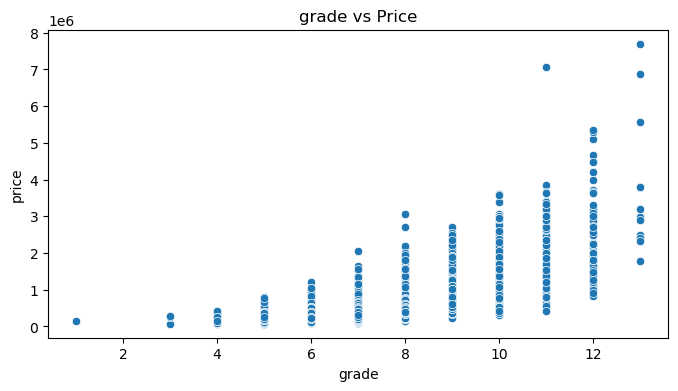

In [16]:
features = ['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'condition', 'grade']

for feature in features:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=df[feature], y=df['price'])
    plt.title(f'{feature} vs Price')
    plt.show()

    
    

In [17]:
df['house_age'] = 2025 - df['yr_built']
df['renovated_flag'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
df['basement_ratio'] = df['sqft_basement'] / (df['sqft_living'] + 1)
df['total_sqft'] = df['sqft_living'] + df['sqft_basement']


In [18]:
df.drop(columns=['yr_built', 'yr_renovated', 'sqft_living', 'sqft_basement'], inplace=True)


In [19]:
df.drop(columns=['sqft_lot', 'sqft_lot15', 'zipcode','date'], inplace=True)


In [20]:

df.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,lat,long,sqft_living15,house_age,renovated_flag,basement_ratio,total_sqft
0,221900.0,3,1.00,1.0,0,0,3,7,1180,47.5112,-122.257,1340,70,0,0.000000,1180
1,538000.0,3,2.25,2.0,0,0,3,7,2170,47.7210,-122.319,1690,74,1,0.155581,2970
2,180000.0,2,1.00,1.0,0,0,3,6,770,47.7379,-122.233,2720,92,0,0.000000,770
3,604000.0,4,3.00,1.0,0,0,5,7,1050,47.5208,-122.393,1360,60,0,0.464049,2870
4,510000.0,3,2.00,1.0,0,0,3,8,1680,47.6168,-122.045,1800,38,0,0.000000,1680


In [21]:
# Define features and target
X = df.drop(columns=['price'])
y = df['price']

In [22]:
X.shape

(21613, 15)

In [23]:
y.shape

(21613,)

In [24]:
X.head()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,lat,long,sqft_living15,house_age,renovated_flag,basement_ratio,total_sqft
0,3,1.00,1.0,0,0,3,7,1180,47.5112,-122.257,1340,70,0,0.000000,1180
1,3,2.25,2.0,0,0,3,7,2170,47.7210,-122.319,1690,74,1,0.155581,2970
2,2,1.00,1.0,0,0,3,6,770,47.7379,-122.233,2720,92,0,0.000000,770
3,4,3.00,1.0,0,0,5,7,1050,47.5208,-122.393,1360,60,0,0.464049,2870
4,3,2.00,1.0,0,0,3,8,1680,47.6168,-122.045,1800,38,0,0.000000,1680


In [25]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [26]:
# Train-test split
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np


In [29]:
# Initialize and train
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
lr_preds = lr_model.predict(X_test)

# Evaluate
print("🔹 Linear Regression Results")
print("R² Score:", r2_score(y_test, lr_preds))
print("MAE:", mean_absolute_error(y_test, lr_preds))
print("RMSE:", mean_squared_error(y_test, lr_preds, squared=False))


🔹 Linear Regression Results
R² Score: 0.6980949436384818
MAE: 128513.90691805206
RMSE: 213637.57589538247


In [30]:
# Initialize and train
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_preds = rf_model.predict(X_test)

# Evaluate
print("\n🔹 Random Forest Regressor Results")
print("R² Score:", r2_score(y_test, rf_preds))
print("MAE:", mean_absolute_error(y_test, rf_preds))
print("RMSE:", mean_squared_error(y_test, rf_preds, squared=False))



🔹 Random Forest Regressor Results
R² Score: 0.8363193809296697
MAE: 76047.91218176036
RMSE: 157304.47498790195


In [36]:
def evaluate(y_test, y_pred):
    print("R2 Score:", r2_score(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

evaluate(y_test, rf_preds)


R2 Score: 0.8363193809296697
MAE: 76047.91218176036
RMSE: 157304.47498790195


Text(0.5, 1.0, 'Feature Importance')

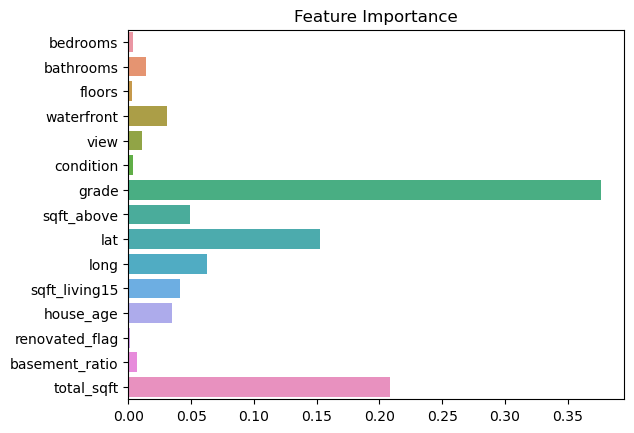

In [38]:
importances = rf_model.feature_importances_
features = X.columns
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")


In [ ]:
pip install pycaret

In [42]:
from pycaret.regression import *

reg_setup = setup(data=df, target='price', session_id=123)
best_model = compare_models()


ModuleNotFoundError: No module named 'pycaret'

In [ ]:
import streamlit as st
import pickle

model = pickle.load(open("model.pkl", "rb"))

st.title("🏠 House Price Predictor")

bedrooms = st.slider("Bedrooms", 1, 10, 3)
bathrooms = st.slider("Bathrooms", 1, 5, 2)
sqft = st.number_input("Sqft Living", 500, 10000, 1500)

# Add other features...

if st.button("Predict Price"):
    features = [[bedrooms, bathrooms, sqft, ...]]
    prediction = model.predict(features)
    st.success(f"Estimated Price: ${prediction[0]:,.2f}")
